# Solution 4

## FINM 37400 - 2023

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# 1 HBS Case: The Information Content of the Yield Curve

## 1.1

The Term Spread
* What is the term spread? 
* What is the preferred measure of the term spread in the case?
* What evidence is cited for the term spread's power in predicting recessions?
* Which is more important, the level of the term spread, its month-over-month change, or the level of short rates?

Using the file `yields_2022-11-30.xlsx`, calculate the term spread as of the end of November 2022.
* What does this term spread suggest about economic growth, according to the evidence of Estrella?

## 1.2

Term premia
* What is the term premium? Why is it impossible to get a direct measure of it?
* Explain equations (1) and (2). Why does Sacks think this concept of the term spread complicates the relationship found by Estrella?

## 1.3

Though this case touches on monetary policy, that is not our focus. Rather, our focus is the degree to which the current shape of the yield curve is predictive of future short-term interest rates.

Suppose the term premium is zero. 
* What does an upward sloping yield curve predict about future short-term rates? 
* In this case, is it risky to hold long-term bonds? Is this risk compensated?

Suppose the term premium increases 3 percentage points.
* What would change about your previous answer?

# 2 Calculating Forwards

Use the treasury issues in `'../data/selected_treasury_rates.xlsx.xlsx`. 

The selected treasuries are at nearly six-month intervals. Approximate that they mature at perfect 6-month intervals. (We are looking at them from the perspective of March 31, 2022.)

## 2.1 
Bootstrap the discount factor. Plot the answer in terms of discount factors and discount rates.

## 2.2
Calculate the entire forward curve for rates from $T$ to $T+0.5$, ranging $T$ from 0.5 through 6.5.

Plot the forward discount curve.

## 2.3
Use the discount factors to calculate the forward rate from $T_1=2$ to $T_2=2.5$.

Do the same for $T_1=5$ to $T_2=5.5$.

## 2.4
Explain how an FRA between $T_1$ and $T_2$ would function. How is the rate calculated above involved?



# <span style="color:red">Solutions</span>

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

# <span style="color:red">Solution 1</span>

## 1.1 Term spread
* Refers to the slope of the yield curve. 
* Many measures will give similar results, (and they are over 90% correlated to each other.) The case prefers the 10yr minus the 3mo measure of yields (YTM) on US Treasuries. But it is common to see reference to 10yr-2yr, 10yr-1yr, etc. None of the results would be substantively different.

* The term spread becoming negative has preceded every recession since (at least) the mid 20th century. It has had only one "false alarm". 

* The case cites statistical evidence that it is the **level** of the **term spread** that matters--not its recent change. (Don't get confused: the level of the term spread means the slope of the yield curve.) Nor is it the short-term rate on its own that matters so much. So notwithstanding the focus on the short rate for monetary policy, the level of this rate is not what has the impact on predicting recessions.

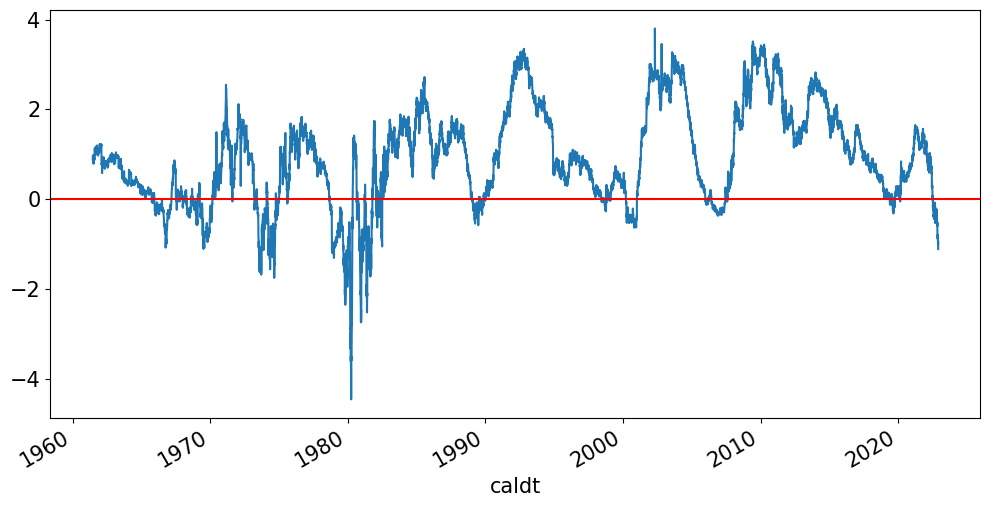

In [2]:
filepath = '../data/yields_2022-11-30.xlsx'
yields = pd.read_excel(filepath, sheet_name='yields')
yields.set_index('caldt',inplace=True)

TS = yields[10] - yields[1]
ax = TS.plot()
ax.axhline(0, c='r')

The term spread at the end of the series is negative, thus predicting a recession.

## 1.2 Term premium

The common explanation for the negative term spread predicting recession is that it reflects the market's forecast of decreasing short-term interest rates due to future economic slowdown.

However, Sacks (and Berner,) are pointing out that the mathematics of yields show there is an extra factor: the term premium, which is a function of the risk premium investors demand for taking on interest-rate risk. Long-term bonds carry interest-rate risk with regard to their short-term valuation. So holding a 10-year bond for 2 years is riskier than holding a 2-year bond for 2 years.

Thus, an inverted yield curve, (i.e. negative term spread,) could be due to a decreasing term premium rather than expected decrease in short rates. A shrinking term premium (risk premium on long term bonds,) is typically associated with a strong market, where risk premia and risk aversion are shrinking.

## 1.3 Forecasting the Short Rate

If the term premium is zero...
* an upward sloping yield curve is indeed a reflection that the market expects short rates to rise over time.
* the market is pricing zero risk premium to long-term bonds. Thus, though there is interest-rate risk to them, the market (in the case of zero term premium,) is saying this is an uncompensated, (and potentially idiosyncratic) risk.

If the term premium jumps up...
* This would cause the term spread to jump, without any change to the forecast of future short rates! Similarly, if the premium decreased, the term spread would go down without any change to forecasted short rates.
* A positive term premium says the market compensates investors willing to hold long-term bonds, presumably as risk premium for the risk of interest-rate movements (which impact the immediate pricing of the long-term bond) as well as possibly inflation risks.

# <span style="color:red">Solution 2</span>

In [3]:
filepath = '../data/selected_treasury_rates.xlsx'
quotes = pd.read_excel(filepath, sheet_name='data').set_index('KYTREASNO')
quotes

,issue date,maturity date,maturity,coupon rate,price,ytm
KYTREASNO,,,,,,
206896,2015-09-30,2022-09-30,0.501027,1.750,100.363281,0.010144
207688,2021-03-31,2023-03-31,0.999316,0.125,98.457031,0.016804
207775,2021-09-30,2023-09-30,1.500342,0.250,97.218750,0.021307
207077,2017-03-31,2024-03-31,2.001369,2.125,99.570312,0.023294
207416,2019-09-30,2024-09-30,2.502396,1.500,97.621094,0.024680
207507,2020-03-31,2025-03-31,3.000684,0.500,94.175781,0.025101
207256,2018-09-30,2025-09-30,3.501711,3.000,101.554688,0.025142
207337,2019-03-31,2026-03-31,4.000000,2.250,98.929688,0.025154
207777,2021-09-30,2026-09-30,4.501027,0.875,93.042969,0.025020


## 2.1

In [4]:
QUOTE_DATE = '2022-03-31'
t_date = pd.to_datetime(QUOTE_DATE)


CF = pd.DataFrame(data=0, index=quotes.index, columns=quotes['maturity date'])

for i in quotes.index:
    coupon_dates = get_coupon_dates(t_date,pd.to_datetime(quotes.loc[i,'maturity date']))

    if coupon_dates is not None:
        CF.loc[i,coupon_dates] = quotes.loc[i,'coupon rate']/2

    CF.loc[i,quotes.loc[i,'maturity date']] += 100

CF = CF.resample('m',axis=1).sum()
CF.drop(columns=CF.columns[(CF==0).all()],inplace=True)
CF = CF.fillna(0).sort_index(axis=1)
CF

maturity date,2022-09-30,2023-03-31,2023-09-30,2024-03-31,2024-09-30,2025-03-31,2025-09-30,2026-03-31,2026-09-30,2027-03-31,2027-09-30,2028-03-31,2028-09-30,2029-03-31
KYTREASNO,,,,,,,,,,,,,,
206896,100.8750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207688,0.0625,100.0625,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207775,0.1250,0.1250,100.1250,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207077,1.0625,1.0625,1.0625,101.0625,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207416,0.7500,0.7500,0.7500,0.7500,100.7500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207507,0.2500,0.2500,0.2500,0.2500,0.2500,100.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207256,1.5000,1.5000,1.5000,1.5000,1.5000,1.5000,101.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207337,1.1250,1.1250,1.1250,1.1250,1.1250,1.1250,1.1250,101.1250,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207777,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,100.4375,0.0000,0.0000,0.0000,0.0000,0.0000


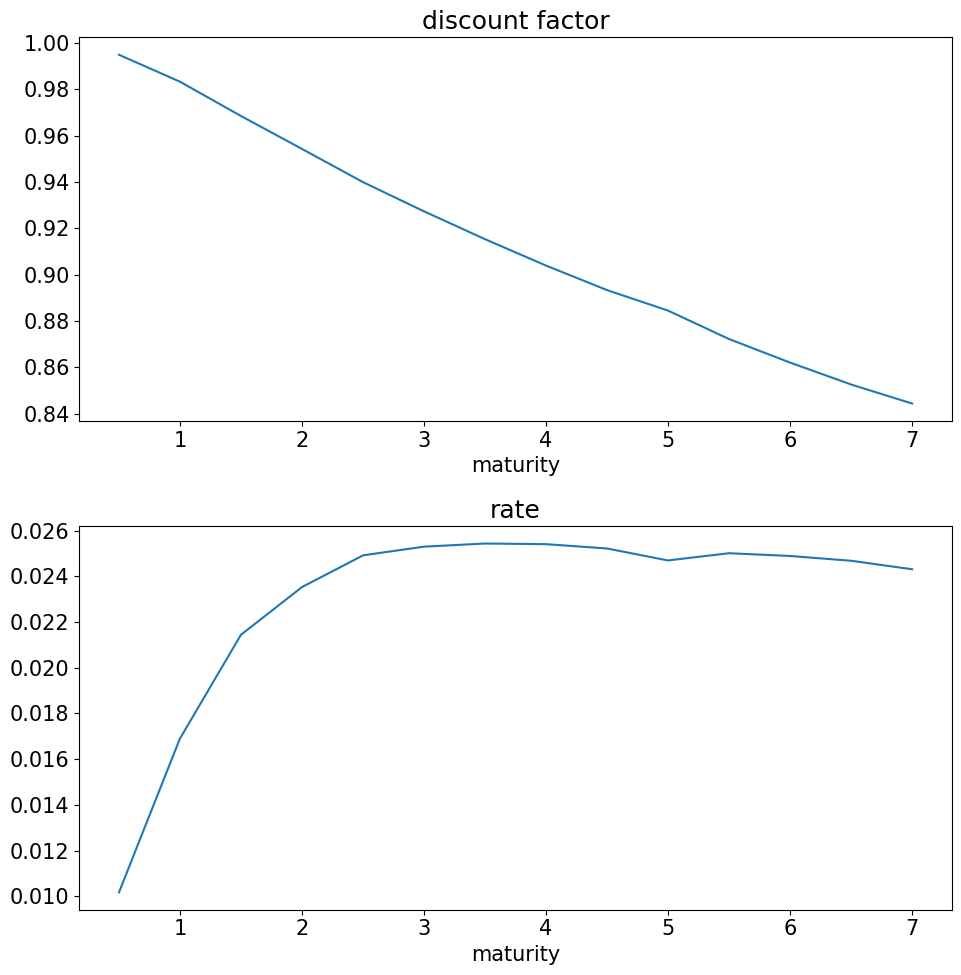

In [5]:
COMPOUNDING = 2
spot = pd.DataFrame(np.linalg.solve(CF,quotes['price'].loc[CF.index]), index=CF.index, columns=['discount factor'])
spot.insert(0,'maturity',quotes['maturity'])
spot = spot.reset_index().set_index('maturity')
spot['rate'] = discount_to_intrate(spot['discount factor'], spot.index,n_compound=COMPOUNDING)

fig, ax = plt.subplots(2,1,figsize=(10,10))
spot['discount factor'].plot(ax=ax[0],title='discount factor')
spot['rate'].plot(ax=ax[1],title='rate')
plt.tight_layout()
plt.show()

## 2.2

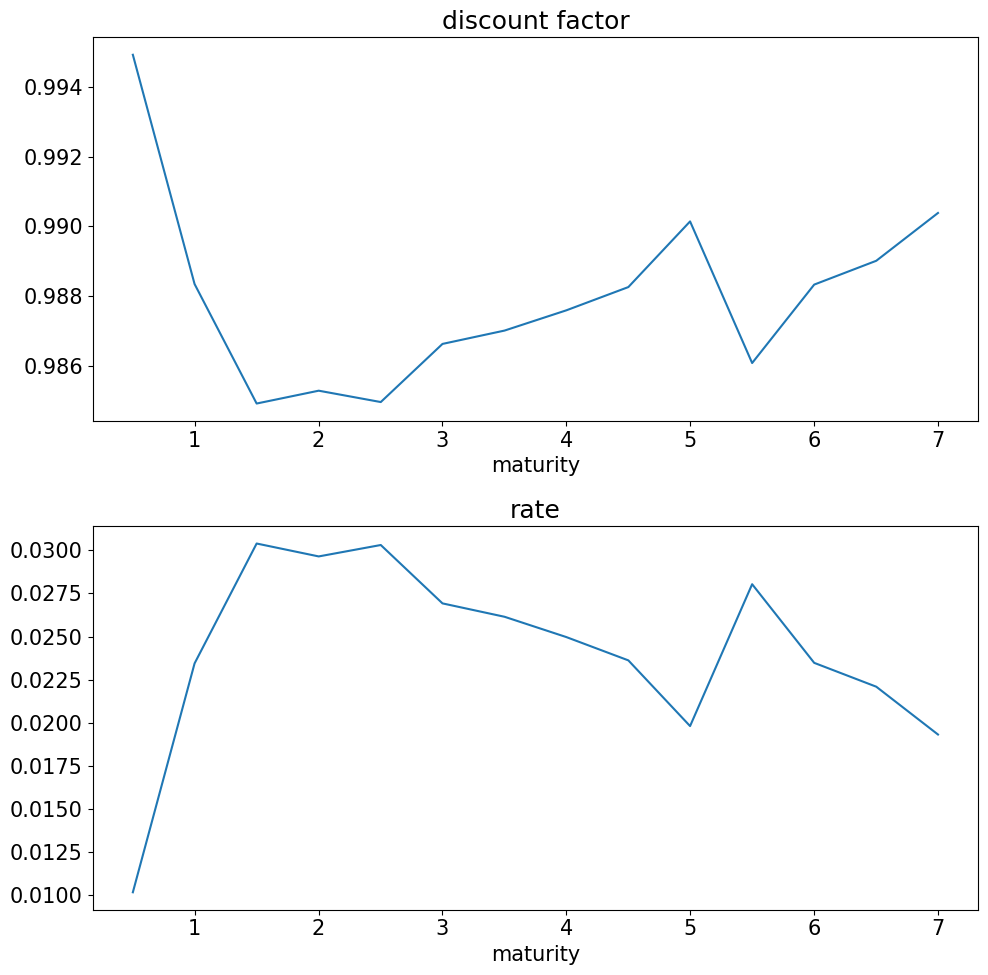

In [6]:
forward = pd.DataFrame(spot['discount factor']/spot['discount factor'].shift(),index=spot.index, columns=['discount factor'])
forward['discount factor'].iloc[0] = spot['discount factor'].iloc[0]
forward['rate'] = -np.log(forward['discount factor']) / forward.index.to_series().diff().mean()

fig, ax = plt.subplots(2,1,figsize=(10,10))
forward['discount factor'].plot(ax=ax[0],title='discount factor')
forward['rate'].plot(ax=ax[1],title='rate')
plt.tight_layout()
plt.show()

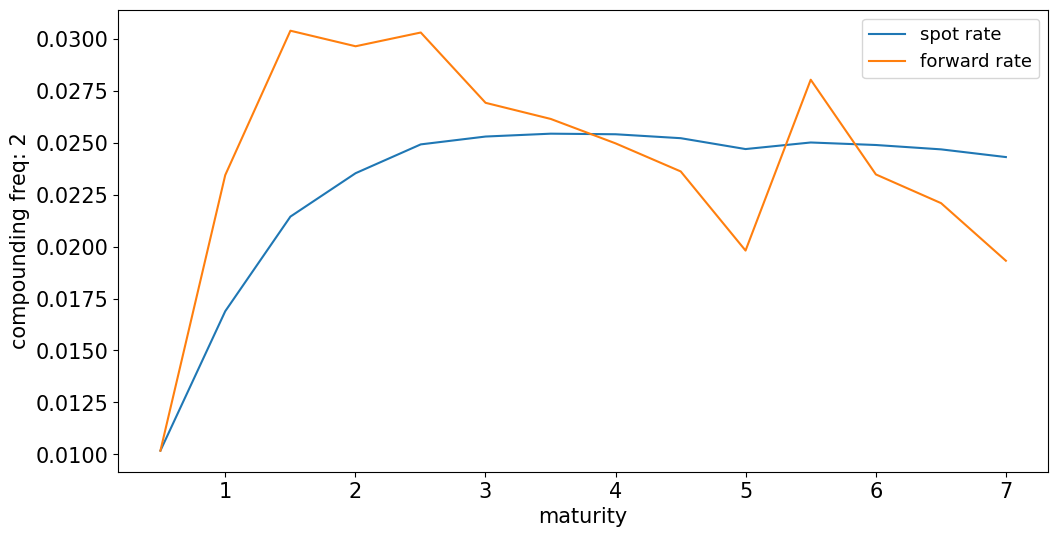

In [7]:
fig, ax = plt.subplots()
spot['rate'].plot(ax=ax)
forward['rate'].plot(ax=ax)
plt.legend(['spot rate','forward rate'])
plt.ylabel(f'compounding freq: {COMPOUNDING}')
plt.show()

## 2.3

In [8]:
T2list = [2.5,5.5]
for T2 in T2list:
    forwardrate = forward['rate'].iloc[int(T2*2)]
    print(f'The Forward Rate at {T2-.5} to {T2} is {forwardrate:.2%}')

The Forward Rate at 2.0 to 2.5 is 2.69%
The Forward Rate at 5.0 to 5.5 is 2.35%


## 2.4

The FRA would have contract parameters for...
* the notional amount
* the dates $T_1$ and $T_2$
* the floating rate index that will be paid to the counterparty, $index$

Given that, the counterparties would agree on a forward rate for the exchange of the payment,
$$N\kappa[r_n(T_1,T_2)-f_n(t,T_1,T_2)]$$
where
* $\kappa$ is the fraction of year covered by $T_2-T_1$.
* $N$ is the notional amount.

This fixed forward rate, $f_n(t,T_1,T_2)$ is what is calculated above. 

All the rates above assume $T_2 = T_1 + 0.5$.